In [2]:
pip install uproot awkward

     |████████████████████████████████| 298 kB 4.6 MB/s eta 0:00:01
  Using cached awkward-1.5.1-cp39-cp39-manylinux2010_x86_64.whl (14.1 MB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas 
import uproot
import awkward
import matplotlib.pyplot as plt
import numpy as np

In [7]:
file = uproot.open('trkana_signal.root')
file.keys()
tree = file['TrkAna;1']['trkana;1']
branch = np.array(tree['dem.'])
t = branch['status']
t2= branch['mom'] #values of momentum



In [25]:
zipped_t = zip(t,t2)
sorted_t= sorted(zipped_t) #sorts status and dem together in 2d list. Column 1 = status, Column 2 = dem


x = np.array(sorted_t) #turns sorted values into an array
print(x)

vals = x[x[:,0] > 0] #select rows where only positive values of status is returned

momentum_vals = vals[:,1] #values to be plotted
print(np.mean(momentum_vals))

[[-1000.         -1000.        ]
 [-1000.         -1000.        ]
 [-1000.         -1000.        ]
 ...
 [    2.           104.59921265]
 [    2.           104.63299561]
 [    2.           104.73020172]]
103.41762313613663


103.21025229889213


(array([  1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   1.,   1.,   2.,   3.,   5.,  26., 265.,   3.]),
 array([ 53.12668991,  55.87404613,  58.62140236,  61.36875858,
         64.11611481,  66.86347103,  69.61082726,  72.35818348,
         75.1055397 ,  77.85289593,  80.60025215,  83.34760838,
         86.0949646 ,  88.84232082,  91.58967705,  94.33703327,
         97.0843895 ,  99.83174572, 102.57910194, 105.32645817,
        108.07381439]),
 <BarContainer object of 20 artists>)

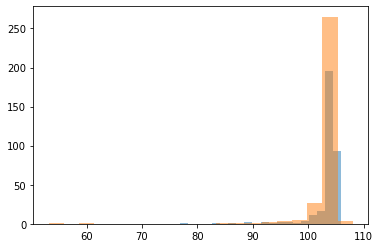

In [29]:
file_bkg= uproot.open("trkana_signalAndBkg.root")
tree_bkg = file_bkg['TrkAna']['trkana;1']
branches2 = tree_bkg.arrays()['dem.']
tbkg= branches2['status']
tbkg2 = branches2['mom']

zipped_bkg = zip(tbkg,tbkg2)
sorted_bkg= sorted(zipped_bkg)
x_bkg = np.array(sorted_bkg)
vals_bkg = x_bkg[x_bkg[:,0] > 0]
momentum_vals_bkg = vals_bkg[:,1]

print(np.mean(momentum_vals_bkg))

plt.hist(momentum_vals, bins= 20, label = "without background", alpha =.5)
plt.hist(momentum_vals_bkg, bins= 20, label = "with background", alpha = .5)



 mean e- fit momentum(without background): 103.41762313613663
Standard deviation e- momentum fit (without background): 2.9102938420352182
 
 mean e- fit momentum (with background): 103.21025229889213
Standard deviation e- fit momentum (with background): 4.429148071359829
 
 mean mu- fit momentum (with background): 103.84624478896218
Standard deviation mu- fit momentum (with background): 2.9370215469212835
 
 mean mu- fit momentum(without background): 103.8179066767458
Standard deviation mu- momentum fit (without background): 3.6751043652672575


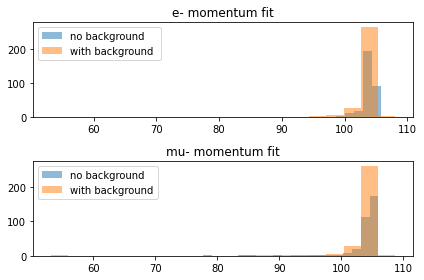

In [100]:
#UEM

branch_mu = np.array(tree['dmm.'])
t_mu=branch_mu['status']
t_mu2=branch_mu['mom']

zipped_mu = zip(t_mu,t_mu2)
sorted_mu= sorted(zipped_mu)
x_mu = np.array(sorted_mu)
vals_mu = x_mu[x_mu[:,0] > 0]

momentum_vals_mu = vals_mu[:,1]

#UEM BKG
branch_mu2 = np.array(tree_bkg['dmm.'])
t_mu_bkg=branch_mu2['status']
t_mu2_bkg=branch_mu2['mom']
zipped_mu_bkg = zip(t_mu_bkg,t_mu2_bkg)
sorted_mu_bkg= sorted(zipped_mu_bkg)
x_mu_bkg = np.array(sorted_mu_bkg)
vals_mu_bkg = x_mu_bkg[x_mu_bkg[:,0] > 0]
momentum_vals_mu_bkg = vals_mu_bkg[:,1]
fig, axs = plt.subplots(2)

axs[0].hist(momentum_vals, bins= 20, label = "no background ", alpha =.5)
axs[1].hist(momentum_vals_mu, bins = 20, label = 'no background', alpha = .5)
axs[0].set_title("e- momentum fit")

axs[0].hist(momentum_vals_bkg, bins= 20, label = "with background ", alpha = .5)
axs[1].hist(momentum_vals_mu_bkg, bins = 20, label = 'with background', alpha = .5)
axs[1].set_title("mu- momentum fit")

axs[0].legend()
axs[1].legend()
fig.tight_layout()

print("\n mean e- fit momentum(without background):", np.mean(momentum_vals))
print("Standard deviation e- momentum fit (without background):", np.std(momentum_vals) )

print(" \n mean e- fit momentum (with background):", np.mean(momentum_vals_bkg))
print("Standard deviation e- fit momentum (with background):", np.std(momentum_vals_bkg))

print(" \n mean mu- fit momentum (with background):", np.mean(momentum_vals_mu))
print("Standard deviation mu- fit momentum (with background):", np.std(momentum_vals_mu))

print(" \n mean mu- fit momentum(without background):", np.mean(momentum_vals_mu_bkg))
print("Standard deviation mu- momentum fit (without background):", np.std(momentum_vals_mu_bkg) )

